# 0. Setup

## 0.1 Import Libraries

In [63]:
dir.create("~/R/libs", recursive = TRUE)

# Install the packages to this directory
#install.packages("jsonlite", lib = "~/R/libs")
#install.packages("rirods", lib = "~/R/libs")
#install.packages("rappdirs", lib = "~/R/libs")
#install.packages("curl", lib = "~/R/libs")
#install.packages("openssl", lib = "~/R/libs")
#install.packages("httr2", lib = "~/R/libs")
# Load the packages from the custom library
library(jsonlite, lib.loc = "~/R/libs")
library(rappdirs, lib.loc = "~/R/libs")
library(curl, lib.loc = "~/R/libs")
library(openssl, lib.loc = "~/R/libs")
library(httr2, lib.loc = "~/R/libs")
library(rirods, lib.loc = "~/R/libs")

Warning message in dir.create("~/R/libs", recursive = TRUE):
“'/home/admin/R/libs' already exists”


## 0.2 Define Variables

In [64]:
read_credentials <- function(file_path) {
  credentials <- fromJSON(file_path)
  return(credentials)
}

# Read credentials
credentials <- read_credentials('credentials.json')

IRODS_URL <- "http://kcs-ediaqi-kdp.demo.know-center.at"
IRODS_PORT <- 1247
IRODS_USER <- credentials$IRODS_USER
IRODS_PASSWORD <- credentials$IRODS_PASSWORD
IRODS_ZONE <- "ediaqi"
IRODS_COLLECTION <- "/ediaqi/home/test2"
create_irods("http://kcs-ediaqi-kdp.demo.know-center.at:9000/irods-http-api/0.3.0")
iauth(IRODS_USER, IRODS_PASSWORD)

# 1. Read Folders/Files

## 1.1. Discover Subcollections & Files

In [65]:
icd(".")
ipwd()
ils()

[1] "/ediaqi/home/test2"


iRODS Zone
                                   logical_path
                        /ediaqi/home/test2/test
       /ediaqi/home/test2/CO_THI_FE_001_new.csv
          /ediaqi/home/test2/NO2_THI_FE_003.csv
       /ediaqi/home/test2/O3_THI_FE_001_new.csv
         /ediaqi/home/test2/PM10_THI_FE_001.csv
 /ediaqi/home/test2/PM10_THI_FE_001andPM2.5.csv
         /ediaqi/home/test2/PM10_THI_FE_002.csv
  /ediaqi/home/test2/PM10_THI_FE_005-review.csv
        /ediaqi/home/test2/PM2_5_THI_FE_001.csv

# 1.3 Copy to Working Directory

In [66]:
chosen_file_path <- "/ediaqi/home/test2/PM10_THI_FE_001.csv"

iget(chosen_file_path, "PM10_THI_FE_001.csv", overwrite=TRUE)
print('Done.')

[1] "Done."


# 2. Read into Data Frame

## 2.1 Convert from a Dowloaded file

In [67]:
df <- read.csv("PM10_THI_FE_001.csv")

## 2.2 Convert the DataFrame

In [68]:
df$start_time <- as.POSIXct(df$phenomenonTimeStart, format="%Y-%m-%dT%H:%M:%S")

## 2.3 Filter DataFrame for Datastream

In [69]:
filter_stream1 <- 'PM10@THI.FE.001'
filter_stream2 <- 'O3@THI.FE.003'
df_PM10 <- df[df$Datastream == 'PM10@THI.FE.001', ]
df_O3 <- df[df$Datastream == 'O3@THI.FE.003', ]

# 3. Plotting

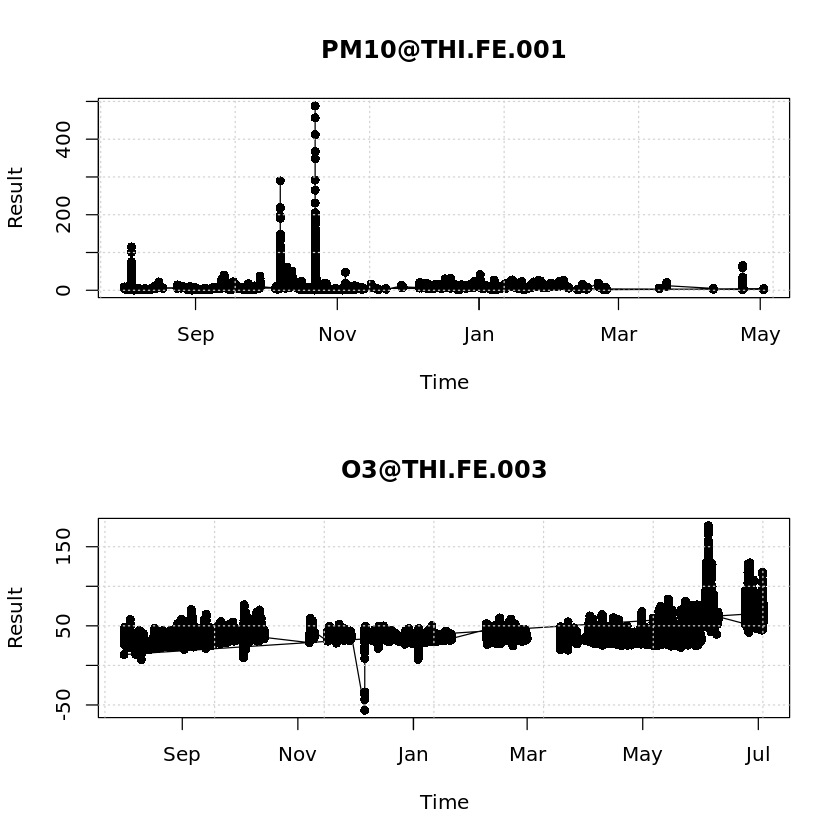

In [70]:
par(mfrow = c(2, 1))

# Plot for PM10@THI.FE.001
plot(df_PM10$start_time, df_PM10$result, type="o", xlab="Time", ylab="Result", main=filter_stream1, pch = 16)
grid()

# Plot for O3@THI.FE.003
plot(df_O3$start_time, df_O3$result, type="o", xlab="Time", ylab="Result", main=filter_stream2, pch = 16)
grid()